In [1]:
from lstm import LSTM
import copy, numpy as np
from activation import Sigmoid, Tanh

np.random.seed(0)

In [2]:
def bin2int(d):
    out = 0
    for index,x in enumerate(d):
        out += x*pow(2,index)
    return out

In [3]:
# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = np.flip(binary[i], axis=0)


In [21]:

# input variables
input_dim = 2
hidden_dim = 16
output_dim = 1
learning_rate = 0.02

arguments = {
    "input_dim": input_dim, 
    "hidden_dim": hidden_dim, 
    "output_dim":output_dim
}

In [22]:
# training logic, for one epoch
acc = 0
total_loss = 0

epochs = 50000
verbose = 1000

batch_size = 8

In [23]:
list_acc = []
list_loss = []

In [24]:
lstm = LSTM(arguments)

for i in range(1, epochs+1):
    # generate a simple addition problem (a + b = c)
    ans = []
    for _ in range(batch_size):
        a_int = np.random.randint(largest_number/2) # int version
        a = int2binary[a_int] # binary encoding
        a = np.reshape(a, (1, -1, 1))

        b_int = np.random.randint(largest_number/2) # int version
        b = int2binary[b_int] # binary encoding
        b = np.reshape(b, (1, -1, 1))
        # true answer
        c_int = a_int + b_int
        c = int2binary[c_int]
        c = np.reshape(c, (1, -1, 1))
        ans.append(c_int)
        
        if _ == 0:
            X = np.concatenate((a,b), axis= 2)
            y = c
        else:
            x = np.concatenate((a,b), axis= 2)
            X = np.concatenate((X, x), axis= 0)
            y = np.concatenate((y, c), axis= 0)
    #print(X)
    #print(y)
    output, hidden, loss = lstm.train(X, y, learning_rate = learning_rate)

    # decode output
    bits = list()
    #print(output)
    output = output.reshape(-1, batch_size)
    for j in output.T:
        bits.append([int(np.round(bit)) for bit in j])
    predicts = np.array([bin2int(np.squeeze(num)) for num in bits])
    acc += np.sum(predicts == np.array(ans))/batch_size
    total_loss += loss

    if i%verbose == 0:
        round_acc = acc/verbose
        round_loss = total_loss/verbose
        
        print("Accuracy = {}".format(round_acc))
        print("Total loss = {}".format(round_loss))
        
        #if len(list_loss)>0 and round_loss > list_loss[-1]:
        #    break
        
        list_acc.append(round_acc)
        list_loss.append(round_loss)
        
        total_loss = 0
        acc = 0
    

Accuracy = 0.03875
Total loss = 3.517528965744824
Accuracy = 0.121125
Total loss = 3.2372306687906196
Accuracy = 0.1795
Total loss = 2.8876161509903424
Accuracy = 0.270625
Total loss = 2.4723286680029535
Accuracy = 0.31375
Total loss = 2.2901129324204144
Accuracy = 0.31025
Total loss = 2.221652164845769
Accuracy = 0.348125
Total loss = 2.1511195482421015
Accuracy = 0.413875
Total loss = 2.0487521704639304
Accuracy = 0.494125
Total loss = 1.89053263009634
Accuracy = 0.5585
Total loss = 1.7720050756943373
Accuracy = 0.63075
Total loss = 1.6559346901969167
Accuracy = 0.6775
Total loss = 1.5231723406030968
Accuracy = 0.721
Total loss = 1.4195584371080907
Accuracy = 0.76875
Total loss = 1.3321606701412159
Accuracy = 0.80475
Total loss = 1.2306358120864962
Accuracy = 0.832875
Total loss = 1.1783006775614013
Accuracy = 0.864125
Total loss = 1.1248547809962255
Accuracy = 0.87925
Total loss = 1.0923446471177847
Accuracy = 0.88775
Total loss = 1.062813295052722
Accuracy = 0.898125
Total loss = 1

KeyboardInterrupt: 

Text(0,0.5,'Acc')

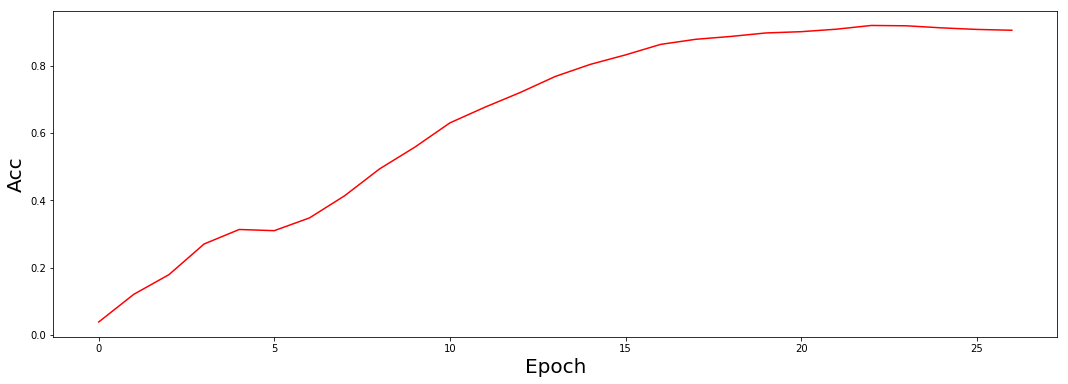

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(list_acc, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Acc", fontsize=20)

Text(0,0.5,'Loss')

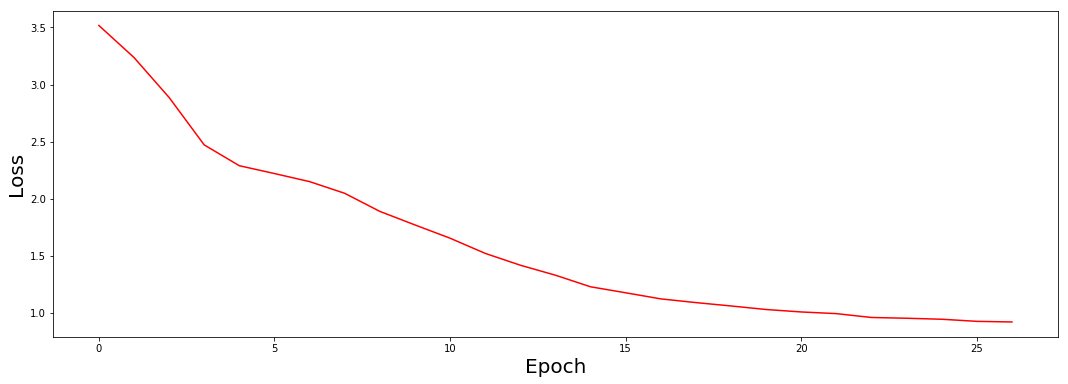

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(list_loss, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)